# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
from scipy.stats import norm, t 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Explore the data frame

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


#### 1. Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

***

Normality visually assessed by histogram and quantile-quantile plots.

Steps:

- Plot the distribution of temperatures
- qq-plot

#### Histograms

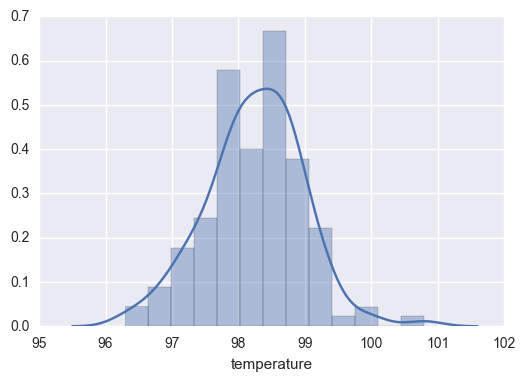

In [5]:
sns.distplot(df.temperature)

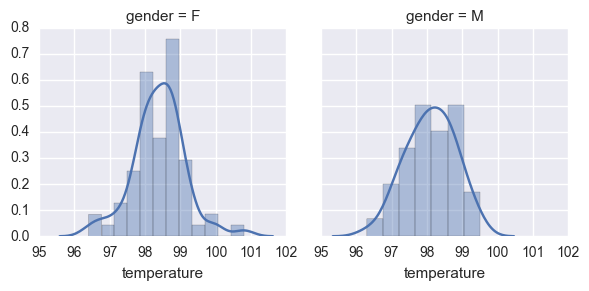

In [6]:
g = sns.FacetGrid(df, col="gender")  
g.map(sns.distplot, "temperature") 

In [7]:
df.groupby('gender')['temperature'].describe()

gender       
F       count     65.000000
        mean      98.393846
        std        0.743488
        min       96.400000
        25%       98.000000
        50%       98.400000
        75%       98.800000
        max      100.800000
M       count     65.000000
        mean      98.104615
        std        0.698756
        min       96.300000
        25%       97.600000
        50%       98.100000
        75%       98.600000
        max       99.500000
Name: temperature, dtype: float64

#### "quantile-quantile plot"

***

Compare the observed values against the expected values from a normal distribution with the observed mean and standard deviation.

Obtain the observed values at each percentile from 1 to 100 from the sample.

Use scipy.stats.norm to get the theoretical values at each percentile from 1 to 100 for a normally distributed population with the same mean and standard deviation as the observations.

In [14]:
obs_dist = np.percentile(df.temperature, np.arange(1,101))

In [15]:
expect_dist = norm.ppf(np.arange(0.01,1.01,0.01), loc=df.temperature.mean(), scale=df.temperature.std())

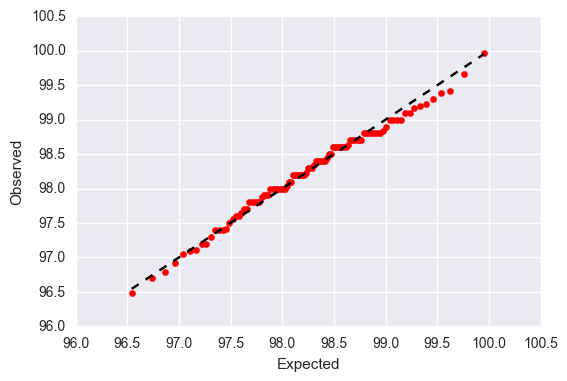

In [16]:
plt.scatter(expect_dist, obs_dist, color='r')
plt.xlabel("Expected")
plt.ylabel("Observed")
plt.plot(expect_dist, expect_dist, linestyle='--', color='k')

#### 2. Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

***

Although there is no clear reference for this, there is a convention that sample sizes over 30 are considered 'large'.

In this case, there are a subset of 130 observations derived from a data set of 700 measurements taken from 146 individuals (122 M, 26 F) taken at several different times over 2 days.  There are 65 observations for males and females, each. 

I think that observations from the same person could be "systematically higher/lower".
                                                                                                                                                                                                                                                                                                                                              

#### 3. Is the true population mean really 98.6 degrees F?

- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  t or  z statistic?
- Now try using the other test. How is the result be different? Why?

***

I would use a two-sided one-sample test because we are evaluating whether the (single-value) population mean is "contained" within the sample mean distribution.

- Null hypothesis: True population mean is 98.6
- Alternative hypothesis: True population mean is not equal to 98.6

In this case, since there are enough observations, a z-statistic would be ok.

$$z=\frac{\bar{X} - 98.6}{s_\bar{X}}$$


In [11]:
z_score = (df.temperature.mean() - 98.6)/(df.temperature.std()/np.sqrt(130))
print(z_score)
# obtain probability of getting a more extreme z-score
norm.sf(abs(z_score))*2

-5.45482329236


4.9021570141133797e-08

Calculate the t-statistic (same as z in this case).

$$t=\frac{\bar{X} - 98.6}{s_\bar{X}}$$

In [12]:
# obtain probability of getting a more extreme t-statistic, note the t degrees of freedom
t.sf(abs(z_score),129)*2

2.4106320415609943e-07

Using either the z/standard normal or t distributions to evaluate the significance of the test statistics, the conclusion is the same, the null hypothesis is rejected.
The t-statistic is slightly more conservative in that the probability that the null hypothesis is true is slightly higher.

#### 4. At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

***

We are given the observations of "normal" temperatures.
Use the mean and standard deviation of the sample to calculate a 95% confidence interval for normal temperatures.

In [34]:
z_95 = norm.ppf(0.975)
print(z_95)
ci_lower = df.temperature.mean() - z_95*df.temperature.std()
ci_upper = df.temperature.mean() + z_95*df.temperature.std()

print("95%% confidence interval [%f, %f]" % (ci_lower, ci_upper))

1.95996398454
95% confidence interval [96.812218, 99.686243]


#### 5. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

***

Null hypothesis: $$\bar{F} - \bar{M} = 0$$
Alternative: $$\mid\bar{F} - \bar{M}\mid \neq 0$$

Calculate the z-statistic:

$$z=\frac{\bar{F}-\bar{M}}{S_{\bar{F}-\bar{M}}}$$

Evaluate the "significance"

In [ ]:
# difference of means
diff_means = df.temperature[df.gender == 'F'].mean() - df.temperature[df.gender == 'M'].mean()
print("mean difference: %f" % (diff_means))

f_var = df.temperature[df.gender == 'F'].var()/df.temperature[df.gender == 'F'].count()
m_var = df.temperature[df.gender == 'M'].var()/df.temperature[df.gender == 'M'].count()

# std deviation of difference of sample means
std_diff = np.sqrt(f_var+m_var)

z_score = diff_means/std_diff
z_score

In [ ]:
norm.sf(abs(z_score))*2

The probability of the observed difference between the sample means of the male and female temperature measurements, assuming the null hypothesis, is 0.022.  Depending on the rejection threshold, you could reject the null hypothesis and conclude that there is a difference in the normal temperatures between males and females.  Other considerations are the effect size.